this notebook contains my notes from http://www.nltk.org/book/

In [55]:
from nltk.probability import FreqDist
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
from nltk.corpus import stopwords

how to open file so it is readable for nltk:

In [4]:
with open('centralasia.txt', errors="ignore") as file:
    file_contents = file.read()

file needs to be tokenized so words can be evaluated (otherwise, letters will be evaluated):

In [5]:
file_in_words = word_tokenize(file_contents)

exclude stopwords (english language) and list most frequent words:

In [39]:
stop_words = set(stopwords.words("english"))

filtered_sent=[]
for w in file_in_words:
    if len(w) <= 4:
        continue
    if w == "GOOGLE":
        continue
    if w not in stop_words:
        filtered_sent.append(w)

fdist = FreqDist(filtered_sent)
print(fdist)
print(fdist.most_common(50))

<FreqDist with 26892 samples and 124142 outcomes>
[('Central', 725), ('around', 564), ('Kazakhstan', 539), ('hours', 469), ('There', 417), ('Uzbekistan', 411), ('Kyrgyzstan', 392), ('local', 331), ('border', 315), ('Tajikistan', 311), ('Russian', 305), ('Almaty', 302), ('Valley', 290), ('Soviet', 289), ('Tashkent', 279), ('place', 264), ('three', 260), ('region', 255), ('Turkmenistan', 250), ('country', 244), ('centre', 238), ('along', 234), ('Bishkek', 232), ('station', 230), ('daily', 223), ('Astana', 222), ('including', 222), ('rooms', 219), ('Bukhara', 218), ('south', 218), ('Kyrgyz', 214), ('though', 214), ('across', 211), ('Uzbek', 210), ('small', 210), ('Samarkand', 209), ('travellers', 208), ('shared', 198), ('travel', 194), ('village', 191), ('north', 188), ('summer', 187), ('Mon-Fri', 187), ('century', 183), ('often', 183), ('taxis', 182), ('train', 181), ('mains', 175), ('great', 173), ('Asian', 172)]


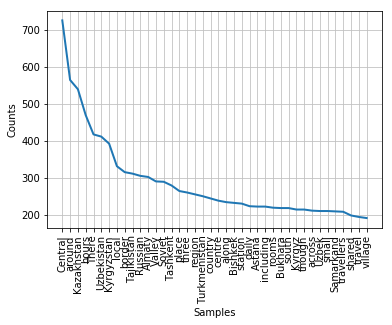

In [13]:
fdist.plot(40,cumulative=False)
plt.show()

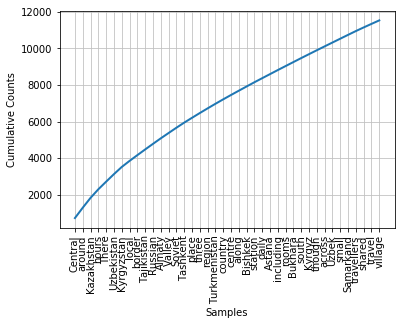

In [42]:
fdist.plot(40, cumulative=True)

"concordance": see occurences of a specified word in its context:

In [56]:
from nltk.text import Text  

text1 = Text(file_in_words)

In [10]:
text1.concordance("beaten")

Displaying 23 of 23 matches:
ars . Head even a little bit off the beaten track and you 'll likely have the pl
ple live . Budget travellers off the beaten track may still have to use the occa
he banks of the Oxus River . Off the Beaten Track Central Asia 's remoter gems t
streets . If you want to get off the beaten track make a detour to Nurata and th
Z MASLANKA / SHUTTERSTOCK Â© OFF THE BEATEN TRACK IN UZBEKISTAN Aral Sea Getting
d offer exciting ways to get off the beaten track without blowing your budget . 
are great and the location ca n't be beaten ; plus there 's a small outdoor spac
e valley as a one-day walk . OFF THE BEATEN TRACK ATA-BEYIT MEMORIAL COMPLEX The
r details and reservations . OFF THE BEATEN TRACK WINTER SPORTS AROUND BISHKEK A
troglyphs that are still far off the beaten tourist trail . For visitors headed 
om plus ski lift tickets ) . OFF THE BEATEN TRACK PRISTAN PRZHEVALSK Karakol 's 
5-311511 ) and other firms . OFF THE BEATEN TRACK HIKING TO KÃ–L-ÃœKÃ–K The beau

A concordance permits us to see words in context. For example, we saw that monstrous occurred in contexts such as the ___ pictures and a ___ size . What other words appear in a similar range of contexts? We can find out by appending the term similar to the name of the text in question, then inserting the relevant word in parentheses:

In [15]:
text1.similar("mountains")

region border valley country bazaar centre city pamirs road south
airport route century river east village town way north area


Observe that we get different results for different texts. Austen uses this word quite differently from Melville; for her, monstrous has positive connotations, and sometimes functions as an intensifier like the word very.

The term common_contexts allows us to examine just the contexts that are shared by two or more words, such as monstrous and very. We have to enclose these words by square brackets as well as parentheses, and separate them with a comma:

In [19]:
text1.common_contexts(["mountains", "villages"])

the_of surrounding_there the_around


we can also determine the location of a word in the text: how many words from the beginning it appears. This positional information can be displayed using a dispersion plot. Each stripe represents an instance of a word, and each row represents the entire text. 

In 1.2 we see some striking patterns of word usage over the last 220 years (in an artificial text constructed by joining the texts of the Inaugural Address Corpus end-to-end).

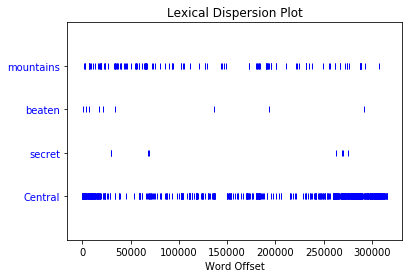

In [34]:
text1.dispersion_plot(["mountains", "beaten", "secret", "Central"])

In [28]:
# vocabulary:
print(len(set(text1)))

31504


Now, let's calculate a measure of the lexical richness of the text. The next example shows us that the number of distinct words is just 6% of the total number of words, or equivalently that each word is used 16 times on average

In [29]:
def lexical_diversity(text):
    return len(set(text)) / len(text)

def percentage(count, total):
    return 100 * count / total

show words that occur only once:

In [43]:
fdist.hapaxes()

['Contents',
 'Survive',
 'kinetic',
 'instinctive',
 'discovery',
 'fascination',
 'pivot',
 'Footprints',
 'page-turning',
 'litters',
 'skylines',
 'limitless',
 'synonymous',
 'wanderer',
 'oddities',
 '¿Bukhara',
 'CHEKUNOV',
 'ALEKSANDR',
 '/SHUTTERSTOCK',
 'sand-prints',
 'engagement',
 'Stan-oholic',
 'Bathhouse',
 'petrodollar',
 'THERIN-WEISE',
 'custom-built',
 'mirage',
 'glass-pyramid',
 'post-Borat',
 'Sweeney',
 'fuelling',
 'silly',
 'MARIUSZ',
 'PRUSACZYK',
 'ALAMY',
 'STOCK',
 'PHOTO',
 'vice-like',
 'CHAPPLE',
 'spreads',
 'MICHAL',
 'KNITL',
 'IRYNA',
 'HROMOTSKA',
 'khaki',
 'EFESENKO',
 'pulverised',
 'DARKYDOORS',
 "'wild",
 'Kara-KÃ¶l',
 'Tackle',
 'NOWAK',
 'LUKASZ',
 'DUDAREV',
 'MIKHAIL',
 'high-alpine',
 'fringed',
 'TDWAY',
 'Untouched',
 'FLASKER',
 'DMITRY',
 'CHULOV',
 'Shangri-La',
 'Bordered',
 'Aprâ€',
 'Sepâ€',
 'Shoulder',
 'ASizzlingly',
 'APrime',
 'Novâ€',
 'ACold',
 'AMany',
 'AMarch',
 'weather-wise',
 'Websites',
 'www.lonelyplanet.com',
 'Pee

long words of the text:

In [50]:
textset = set(text1)
long_words = [w for w in textset if len(w) > 15]
long_wo_urls = [w for w in long_words if not "www" in w]
long_wo_urls = [w for w in long_wo_urls if "-" in w]
print(sorted(long_wo_urls))

["'historical-cultural", '//adventure-manufactory.com/en/tajik/tajik-home', '//aksu-jabagly.kz', '//ariahm.kz/projects/the-barley/', '//asiamountains-hotels.com', '//eco-park.kz/index_en.html', '//hostel-astana.hoteleastana.com/en/', '//hotel-rumi.business.site', '//imbeer.pizza-blues.kz/', '//izi.travel/en/188d-bishkek-city-walking-tour/en', '//khanshatyr.com/en/sky-beach-club', '//korean-house.kz', '//line-brew.kz/line-brew-almaty', '//line-brew.kz/line-brew-karaganda/', '//metelitsa-hotel.kz', '//parmigiano-group.com/en/restaurants/crudo', '//pass.rzd.ru/main-pass/public/en', '//pizza-blues.kz', '//seven-inn-boutique-hotel.hoteleastana.com', '//teplica.pizza-blues.kz', '//valentina-gh.narod.ru', '17Polvon-DarvozaB3', '18Polvon-DarvozaC4', '20Tosh-DarvozaB5', '21Tourism-OwadanD3', '24Samryk-KazynaD7', '28Taki-SarrafonA4', '2Dakhma-i-ShokhonF1', '30Taki-ZargaronE2', '3rd-class/2nd-class', '4Historical-Cultural-Ethnographic', '5Maghok-i-AttarE2', '6Bogcha-DarvozaC1', 'ACommunity-based'

Let's return to our task of finding words that characterize a text. Notice that the long words in text4 reflect its national focus — constitutionally, transcontinental — whereas those in text5 reflect its informal content: boooooooooooglyyyyyy and yuuuuuuuuuuuummmmmmmmmmmm. Have we succeeded in automatically extracting words that typify a text? Well, these very long words are often hapaxes (i.e., unique) and perhaps it would be better to find frequently occurring long words. This seems promising since it eliminates frequent short words (e.g., the) and infrequent long words (e.g. antiphilosophists). Here are all words from the corpus that are longer than seven characters, that occur more than seven times:

In [53]:
fdist_new = FreqDist(text1)
characterizing_words = sorted(w for w in set(text1) if len(w) > 7 and fdist_new[w] > 15)
print(characterizing_words)

['19th-century', '2Activities', '3Entertainment', '4Sleeping', '6Drinking', '7Shopping', '8Getting', '8Information', 'Activities', 'Afghanistan', 'Airlines', 'Aksu-Zhabagyly', 'Ala-Archa', 'Alexander', 'Alternatively', 'Although', 'Altyn-Emel', 'Amu-Darya', 'Arslanbob', 'Ashgabat', 'Asiaâ€™s', 'Avtovokzal', 'Azerbaijan', 'Badakhshan', 'BarskoÃ¶n', 'Bokonbaevo', 'Bolsheviks', 'Buddhist', 'Chimbulak', 'Chinggis', 'Cholpon-Ata', 'Dashoguz', 'December', 'Destination', 'Dushanbe', 'Embassies', 'English-speaking', 'European', 'Festival', 'Furmanov', 'Georgian', 'Guesthouse', 'Highlights', 'Homestay', 'HotelHOTEL', 'Ichon-Qala', 'Independence', 'Information', 'International', 'Irkeshtam', 'Iskander-Kul', 'Issyk-KÃ¶l', 'Jalal-Abad', 'Jeti-Ã–gÃ¼z', 'Jyrgalan', 'Karaganda', 'Karakalpakstan', 'Kazakhstan', 'Kazakhstanâ€™s', 'Kazarman', 'Konye-Urgench', 'Korgalzhyn', 'Kyrgyzstan', 'Kyzylorda', 'Lyabi-Hauz', 'Mangistau', 'Margilon', 'Marshrutka', 'Marshrutkas', 'MasterCard', 'Mausoleum', 'Medressa'

A collocation is a sequence of words that occur together unusually often. Thus red wine is a collocation, whereas the wine is not. A characteristic of collocations is that they are resistant to substitution with words that have similar senses; for example, maroon wine sounds definitely odd.

To get a handle on collocations, we start off by extracting from a text a list of word pairs, also known as bigrams. This is easily accomplished with the function bigrams(): ...

Now, collocations are essentially just frequent bigrams, except that we want to pay more attention to the cases that involve rare words. In particular, we want to find bigrams that occur more often than we would expect based on the frequency of the individual words. The  collocations() function does this for us. We will see how it works later.

The collocations that emerge are very specific to the genre of the texts. In order to find red wine as a collocation, we would need to process a much larger body of text.

In [65]:
a = text1.collocations()

GOOGLE MAP; MAP GOOGLE; Central Asia; Silk Road; Central Asian; per
person; incl breakfast; bus station; train station; shared taxis;
Shared taxis; National Park; Fergana Valley; Aral Sea; shared taxi;
per day; Pamir Hwy; Nature Reserve; Fan Mountains; Bus Station
